# 地址
[交互式图解人工智能 (AI)](https://okai.brown.edu/zh/index.html)

# 手写数字识别项目

## Import libraries

In [3]:
import tensorflow as tf                 # deep learning library     深度学习库
from matplotlib import pyplot as plt    # image plotting library    图像绘制库
import numpy as np                      # used to extract classes from logits       

2022-05-19 20:38:40.584573: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-19 20:38:40.584606: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


## Load data and Train model

In [5]:
# Construct model   构建模型
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),                              # flatten the 28 by 28 picture to 1 by 784      将28乘28的图片平铺为1乘784的图片
    tf.keras.layers.Dense(500, activation=tf.nn.relu),      # A relu layer with 500 weights                 一个有500个权重的 ReLU 层
    tf.keras.layers.Dense(10,  activation=tf.nn.softmax)    # A softmax layer that generates probabilities  生成概率的 Softmax 层
])

sgd = tf.keras.optimizers.SGD(lr=0.7)   # Stochastic Gradient Descent with Learning Rate of 0.7             学习率为 0.7 的随机梯度下降算法

model.compile(
    optimizer = sgd,
    loss      = 'sparse_categorical_crossentropy',     # Loss function is a special version of cross entropy   损失函数是交叉熵的一个特殊版本
    metrics   = ['accuracy']        # 评估指标
)

'''
optimizers      优化器
compile         编译
metrics         指标、评估指标
'''

# Load data
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255, x_test / 255


'''
batch_size      单次训练用的样本数  
                相对于正常数据集，如果过小，训练数据就收敛困难；过大，虽然相对处理速度加快，但所需内存容量增加。

epoch           完成一次全部训练样本        
'''


# Train model
print("training:")
# trains with batch size of 100 and trains over the data 2 times
# 单次训练样本数为 100，对数据进行 2 次训练
model.fit(x_train, y_train, batch_size=100, epochs=5)   
'''
History = model.fit(x, y, batch_size=数值, epochs=数值, verbose=数值, validation_split=数值, validation_data=None, validation_freq=数值)

model.fit()     将训练数据在模型中训练一定迭代次数, 返回一个历史训练数据, 即loss和测量指标.
    x_train         训练数据的输入
    y_train         训练数据的输出
    batch_size      训练一次网络所用的样本数
                    指定进行梯度下降时每个batch包含的样本数。训练时一个batch的样本会被计算一次梯度下降, 使目标函数优化一步。
    epochs          迭代次数
'''

'''
    loss                是我们预先设定的损失函数计算得到的损失值
    accuracy    准确率   是模型在数据集上基于给定 label 得到的评估结果
'''

print("\ntesting:")
loss, accuracy = model.evaluate(x_test, y_test)         # Checks accuracy

print("\naccuracy: {:2.2f}%".format(accuracy * 100))

training:


2022-05-19 21:06:26.405040: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/5
600/600 [==============================] - 4s 5ms/step - loss: 0.2518 - accuracy: 0.9229
Epoch 2/5
600/600 [==============================] - 3s 5ms/step - loss: 0.0915 - accuracy: 0.9729
Epoch 3/5
600/600 [==============================] - 3s 5ms/step - loss: 0.0609 - accuracy: 0.9816
Epoch 4/5
600/600 [==============================] - 3s 5ms/step - loss: 0.0457 - accuracy: 0.9866
Epoch 5/5
600/600 [==============================] - 3s 6ms/step - loss: 0.0339 - accuracy: 0.9897

testing:
313/313 [==============================] - 1s 3ms/step - loss: 0.0759 - accuracy: 0.9772

accuracy: 97.72%


## Set up visualization

In [6]:
def display(i):
    plt.axis('off')
    plt.imshow(x_test[i], cmap='gray')
    print("image:")
    plt.show()
    
    prob = np.max(model.predict(x_test[i:i+1])) * 100       # Probability   概率, 可能性
    pred = np.argmax(model.predict(x_test[i:i+1]))          # 
    print("The model is {:2.2f}% sure it is {}".format(prob, pred))
    
    print("real value: {}".format(y_test[i]))
    print()

# 一切都准备好了。请继续可视化预测。
'''
    proceed   继续
'''

print("Everything's ready. Please proceed to visualizing the predictions. ")

Everything's ready. Please proceed to visualizing the predictions. 


## Visualize data and predictions

image:


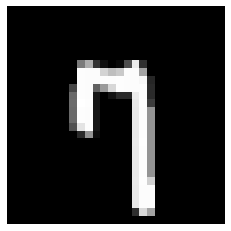

1/1 [==============================] - 0s 28ms/step
The model is 99.89% sure it is 7
real value: 7

image:


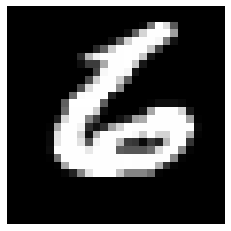

1/1 [==============================] - 0s 29ms/step
The model is 100.00% sure it is 6
real value: 6



In [15]:
# Test Sample Number
i = 80

display(i)
display(9999)

## Wrong Predictions

image:


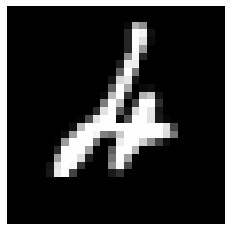

1/1 [==============================] - 0s 21ms/step
The model is 93.70% sure it is 2
real value: 4



In [10]:
# title Example of Wrong Prediction
'''
Note that this is very different from a normally written 4 (somewhat similar to a 2), 
so most models will think it is a 2 rather than a 4
'''

display(247)